Machine learning algoritma naive bayes  
Oleh : edy kurniawan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#memasukan data latih
datalatih = pd.read_excel("datasetlabel.xlsx")
datalatih


,X1,X2,X3,Kelas
0,6.7,6.5,5.9,Tidak Manis
1,7.2,7.2,6.7,Tidak Manis
2,6.3,6.0,5.7,Tidak Manis
3,5.8,5.8,5.6,Tidak Manis
4,6.4,6.4,6.3,Tidak Manis
5,5.2,5.1,4.7,Tidak Manis
6,6.4,6.4,6.1,Tidak Manis
7,6.2,6.6,7.0,Kurang Manis
8,3.7,4.6,5.5,Kurang Manis
9,6.4,6.8,6.8,Kurang Manis


In [7]:
datalatih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      50 non-null     float64
 1   X2      50 non-null     float64
 2   X3      50 non-null     float64
 3   Kelas   50 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


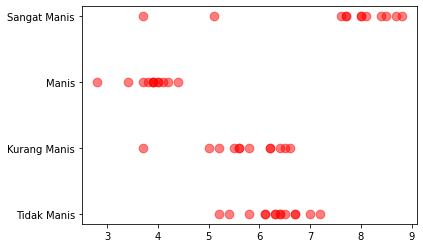

In [15]:
from sklearn.cluster import KMeans
#Memvisualkan persebaran data
plt.scatter(datalatih.X1, datalatih.Kelas, s = 75, c = "r", marker = "o", alpha = 0.5)
plt.show()

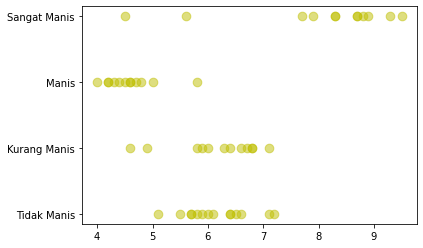

In [16]:
from sklearn.cluster import KMeans
#Memvisualkan persebaran data
plt.scatter(datalatih.X2, datalatih.Kelas, s = 75, c = "y", marker = "o", alpha = 0.5)
plt.show()

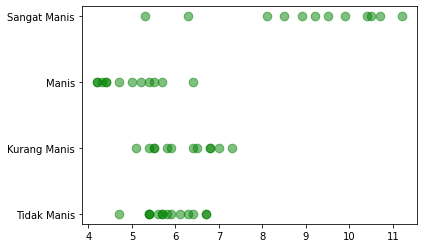

In [17]:
from sklearn.cluster import KMeans
#Memvisualkan persebaran data
plt.scatter(datalatih.X3, datalatih.Kelas, s = 75, c = "g", marker = "o", alpha = 0.5)
plt.show()

In [20]:
x = datalatih.drop(["Kelas"], axis=1)
x

,X1,X2,X3
0,6.7,6.5,5.9
1,7.2,7.2,6.7
2,6.3,6.0,5.7
3,5.8,5.8,5.6
4,6.4,6.4,6.3
5,5.2,5.1,4.7
6,6.4,6.4,6.1
7,6.2,6.6,7.0
8,3.7,4.6,5.5
9,6.4,6.8,6.8


In [21]:
y = datalatih["Kelas"]
y

0      Tidak Manis
1      Tidak Manis
2      Tidak Manis
3      Tidak Manis
4      Tidak Manis
5      Tidak Manis
6      Tidak Manis
7     Kurang Manis
8     Kurang Manis
9     Kurang Manis
10    Kurang Manis
11    Kurang Manis
12    Kurang Manis
13           Manis
14           Manis
15           Manis
16           Manis
17           Manis
18           Manis
19     Tidak Manis
20     Tidak Manis
21     Tidak Manis
22     Tidak Manis
23     Tidak Manis
24     Tidak Manis
25     Tidak Manis
26    Kurang Manis
27    Kurang Manis
28    Kurang Manis
29    Kurang Manis
30    Kurang Manis
31    Kurang Manis
32           Manis
33           Manis
34           Manis
35           Manis
36           Manis
37           Manis
38    Sangat Manis
39    Sangat Manis
40    Sangat Manis
41    Sangat Manis
42    Sangat Manis
43    Sangat Manis
44    Sangat Manis
45    Sangat Manis
46    Sangat Manis
47    Sangat Manis
48    Sangat Manis
49    Sangat Manis
Name: Kelas, dtype: object

In [48]:
from sklearn.model_selection import train_test_split
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("datasetnolabel.xlsx")
datauji

,X1,X2,X3,Kelas
0,6.2,6.2,6.1,NaN
1,5.9,5.9,5.7,NaN
2,5.9,6.1,5.6,NaN
3,6.2,6.8,7.5,NaN
4,6.6,6.4,4.6,NaN
5,6.1,6.7,5.8,NaN
6,5.0,5.6,5.8,NaN
7,2.7,3.7,4.6,NaN
8,4.0,4.6,5.1,NaN
9,3.4,4.6,4.6,NaN


In [49]:
x_test = datauji.drop(["Kelas"], axis=1)
x_test

,X1,X2,X3
0,6.2,6.2,6.1
1,5.9,5.9,5.7
2,5.9,6.1,5.6
3,6.2,6.8,7.5
4,6.6,6.4,4.6
5,6.1,6.7,5.8
6,5.0,5.6,5.8
7,2.7,3.7,4.6
8,4.0,4.6,5.1
9,3.4,4.6,4.6


In [50]:
y_uji = datauji["Kelas"]
y_uji

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: Kelas, dtype: float64

In [51]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Tidak Manis' 'Tidak Manis' 'Tidak Manis' 'Kurang Manis' 'Tidak Manis'
 'Tidak Manis' 'Kurang Manis' 'Manis' 'Manis' 'Manis' 'Manis'
 'Kurang Manis' 'Tidak Manis' 'Tidak Manis' 'Kurang Manis' 'Manis' 'Manis'
 'Sangat Manis' 'Manis' 'Kurang Manis' 'Manis' 'Manis' 'Sangat Manis'
 'Sangat Manis' 'Sangat Manis' 'Sangat Manis' 'Sangat Manis'
 'Sangat Manis' 'Sangat Manis' 'Sangat Manis']


In [54]:
#Setelah mendapatkan kelas pseudolabel dari hasil prediksi sebelumnya, kelas terebut dimasukkan ke data nolabel dan coba uji untuk memastikan hasilnya saja

from sklearn.model_selection import train_test_split
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("datasetpseudolabel.xlsx")
datauji

,X1,X2,X3,Kelas
0,6.2,6.2,6.1,Tidak Manis
1,5.9,5.9,5.7,Tidak Manis
2,5.9,6.1,5.6,Tidak Manis
3,6.2,6.8,7.5,Kurang Manis
4,6.6,6.4,4.6,Tidak Manis
5,6.1,6.7,5.8,Tidak Manis
6,5.0,5.6,5.8,Kurang Manis
7,2.7,3.7,4.6,Manis
8,4.0,4.6,5.1,Manis
9,3.4,4.6,4.6,Manis


In [55]:
x_test = datauji.drop(["Kelas"], axis=1)
x_test

,X1,X2,X3
0,6.2,6.2,6.1
1,5.9,5.9,5.7
2,5.9,6.1,5.6
3,6.2,6.8,7.5
4,6.6,6.4,4.6
5,6.1,6.7,5.8
6,5.0,5.6,5.8
7,2.7,3.7,4.6
8,4.0,4.6,5.1
9,3.4,4.6,4.6


In [56]:
y_uji = datauji["Kelas"]
y_uji

0      Tidak Manis
1      Tidak Manis
2      Tidak Manis
3     Kurang Manis
4      Tidak Manis
5      Tidak Manis
6     Kurang Manis
7            Manis
8            Manis
9            Manis
10           Manis
11    Kurang Manis
12     Tidak Manis
13     Tidak Manis
14    Kurang Manis
15           Manis
16           Manis
17    Sangat Manis
18           Manis
19    Kurang Manis
20           Manis
21           Manis
22    Sangat Manis
23    Sangat Manis
24    Sangat Manis
25    Sangat Manis
26    Sangat Manis
27    Sangat Manis
28    Sangat Manis
29    Sangat Manis
Name: Kelas, dtype: object

In [57]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Tidak Manis' 'Tidak Manis' 'Tidak Manis' 'Kurang Manis' 'Tidak Manis'
 'Tidak Manis' 'Kurang Manis' 'Manis' 'Manis' 'Manis' 'Manis'
 'Kurang Manis' 'Tidak Manis' 'Tidak Manis' 'Kurang Manis' 'Manis' 'Manis'
 'Sangat Manis' 'Manis' 'Kurang Manis' 'Manis' 'Manis' 'Sangat Manis'
 'Sangat Manis' 'Sangat Manis' 'Sangat Manis' 'Sangat Manis'
 'Sangat Manis' 'Sangat Manis' 'Sangat Manis']


In [58]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  1.0


In [59]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

              precision    recall  f1-score   support

Kurang Manis       1.00      1.00      1.00         5
       Manis       1.00      1.00      1.00         9
Sangat Manis       1.00      1.00      1.00         9
 Tidak Manis       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [60]:
# show the confusion matrix based on the prediction result
from sklearn.metrics import confusion_matrix
confusion_matrix(y_uji, Y_predict)

array([[5, 0, 0, 0],
       [0, 9, 0, 0],
       [0, 0, 9, 0],
       [0, 0, 0, 7]], dtype=int64)